In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [3]:
# data_train = pd.read_csv("./datasets/fraudTrain.csv")
# data_test = pd.read_csv("./datasets/fraudTest.csv")
data_train = pd.read_csv("/kaggle/input/fraud-detection/fraudTrain.csv")
data_test = pd.read_csv("/kaggle/input/fraud-detection/fraudTest.csv")

In [4]:
data_train.columns, data_test.columns

(Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
        'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
        'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
        'merch_lat', 'merch_long', 'is_fraud'],
       dtype='object'),
 Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
        'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
        'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
        'merch_lat', 'merch_long', 'is_fraud'],
       dtype='object'))

In [5]:
data = pd.concat([data_train, data_test], axis=0)

In [6]:
data.head(2)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0


In [7]:
data.shape

(1852394, 23)

In [8]:
df = data.copy()

In [9]:
df.shape

(1852394, 23)

In [10]:
df.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

In [11]:
df.drop(columns = [df.columns[0], df.columns[2], df.columns[6], df.columns[7], df.columns[9],  "trans_num"], inplace=True)

In [12]:
df.head(2)

,trans_date_trans_time,merchant,category,amt,gender,city,state,zip,lat,long,city_pop,job,dob,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,"fraud_Rippin, Kub and Mann",misc_net,4.97,F,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,1325376018,36.011293,-82.048315,0
1,2019-01-01 00:00:44,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1325376044,49.159047,-118.186462,0


In [13]:
from imblearn.under_sampling import RandomUnderSampler

# Initialize the sampler
sampler = RandomUnderSampler(random_state=42)

# Separate features and target
X = df.drop('is_fraud', axis=1)
y = df['is_fraud']

# Perform random undersampling
X_resampled, y_resampled = sampler.fit_resample(X, y)

In [14]:
X_resampled.shape, y_resampled.shape

((19302, 16), (19302,))

In [15]:
new_df = X_resampled.copy()

In [16]:
new_df["is_fraud"] = y_resampled

In [17]:
new_df.sample(2)

,trans_date_trans_time,merchant,category,amt,gender,city,state,zip,lat,long,city_pop,job,dob,unix_time,merch_lat,merch_long,is_fraud
64658,2019-02-07 23:57:09,fraud_Barton Inc,grocery_pos,333.47,F,Cranks,KY,40820,36.7558,-83.1838,581,"Psychologist, counselling",1967-02-04,1328659029,37.728382,-82.949322,1
292616,2020-10-09 12:15:41,fraud_Bruen-Yost,misc_pos,50.59,M,Varnell,GA,30756,34.9298,-84.9885,74,Pensions consultant,1944-05-14,1381320941,35.589598,-84.045684,1


In [18]:
new_df.isnull().sum()

,0
trans_date_trans_time,0
merchant,0
category,0
amt,0
gender,0
city,0
state,0
zip,0
lat,0
long,0


### Feature Engineering ###
***Let's calculate the Distance between the merchent and the customer using Haversine distance formula***

In [19]:
from math import radians, sin, cos, sqrt, atan2

def haversine_distance(lat1, lon1, lat2, lon2):
    R = 6371  # Radius of Earth in kilometers
    lat1_rad, lon1_rad = radians(lat1), radians(lon1)
    lat2_rad, lon2_rad = radians(lat2), radians(lon2)
    dlat = lat2_rad - lat1_rad
    dlon = lon2_rad - lon1_rad
    a = sin(dlat / 2)**2 + cos(lat1_rad) * cos(lat2_rad) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))
    return R * c



In [20]:
new_df["distance"] = new_df.apply(lambda row: haversine_distance(row['lat'], row['long'], row['merch_lat'], row['merch_long']), axis=1)

In [21]:
new_df.drop(columns = ["lat", "long", "merch_lat", "merch_long"], inplace = True)

In [22]:
new_df.sample(2)

,trans_date_trans_time,merchant,category,amt,gender,city,state,zip,city_pop,job,dob,unix_time,is_fraud,distance
135742,2020-08-07 23:26:47,"fraud_Lakin, Ferry and Beatty",food_dining,127.17,F,Sutherland,NE,69165,1789,Insurance broker,1982-02-11,1375918007,1,90.055163
407719,2020-11-29 08:41:07,fraud_Bartoletti-Wunsch,gas_transport,44.84,F,Bowersville,OH,45307,338,Quantity surveyor,1988-07-28,1385714467,0,107.142637


***Lets Calculate the age of the customer given their DOB.***

In [23]:
new_df["dob"].dtype

dtype('O')

In [24]:
new_df["dob"] = pd.to_datetime(new_df["dob"])

In [25]:
# Define a function to calculate age
from datetime import datetime
def calculate_age(dob):
    today = datetime.today()
    age = today.year - dob.year
    if (today.month, today.day) < (dob.month, dob.day):
        age -= 1
    return age

In [26]:
# Calculate age
# Apply the function to the 'dob' column
new_df['age'] = new_df['dob'].apply(calculate_age)

In [27]:
new_df.drop(columns = ["dob"], inplace = True)

In [28]:
new_df.sample(2)

,trans_date_trans_time,merchant,category,amt,gender,city,state,zip,city_pop,job,unix_time,is_fraud,distance,age
481926,2019-07-29 20:50:12,"fraud_Mante, Luettgen and Hackett",health_fitness,55.11,M,Fayetteville,NC,28314,238602,"Scientist, research (maths)",1343595012,0,99.068794,31
233449,2019-04-27 23:06:23,fraud_Heidenreich PLC,grocery_pos,287.63,F,West Palm Beach,FL,33417,459921,Historic buildings inspector/conservation officer,1335567983,1,111.025557,64


***We can see there are 693 unique values of Merchants so it's not feasible to keep them as a category, so lets calculate how much % of fraud he did according to the dataset***

In [29]:
new_df["merchant"].nunique()

693

In [30]:
# Step 1: Calculate fraud percentages for each merchant
merchant_groups = new_df.groupby('merchant')
fraud_percentage_dict = {}

for merchant, group in merchant_groups:
    total_trans = group.shape[0]
    total_fraud_trans = group[group["is_fraud"] == 1].shape[0]
    fraud_percentage_dict[merchant] = (total_fraud_trans / total_trans) * 100

# Step 2: Map the calculated percentages back to the DataFrame
new_df["fraud_merchant_pct"] = new_df["merchant"].map(fraud_percentage_dict)

***Lets also keep the Oridinal values of the merchant based on their fraud % values***

In [31]:
# Step 1: Rank merchants based on their fraud percentages
# Sort fraud_percentage_dict by fraud percentage
sorted_fraud_percentage = sorted(fraud_percentage_dict.items(), key=lambda x: x[1])

# Create a dictionary for ordinal encoding
merchant_ordinal_dict = {merchant: rank + 1 for rank, (merchant, _) in enumerate(sorted_fraud_percentage)}

# Step 2: Map the ordinal encoding back to the DataFrame
new_df["merchant_ordinal"] = new_df["merchant"].map(merchant_ordinal_dict)


***From the Below cell we can clearly see merchant with the name fraud_Parisian, Schiller and Altenwerth of the category misc_net has highest rate of farud (93% and 27 successfull fraud attempts in 29 tansactions)***

In [32]:
new_df[(new_df["fraud_merchant_pct"] == new_df["fraud_merchant_pct"].max())& new_df["is_fraud"] == 1]

,trans_date_trans_time,merchant,category,amt,gender,city,state,zip,city_pop,job,unix_time,is_fraud,distance,age,fraud_merchant_pct,merchant_ordinal
21668,2019-01-13 23:45:34,"fraud_Parisian, Schiller and Altenwerth",misc_net,790.35,F,San Jose,CA,95148,973849,Science writer,1326498334,1,49.672104,69,93.103448,693
49909,2019-01-29 22:05:23,"fraud_Parisian, Schiller and Altenwerth",misc_net,666.70,M,Houston,TX,77027,2906700,Community development worker,1327874723,1,10.008444,62,93.103448,693
72074,2019-02-12 01:54:28,"fraud_Parisian, Schiller and Altenwerth",misc_net,893.06,F,West Frankfort,IL,62896,12626,Trading standards officer,1329011668,1,102.172722,28,93.103448,693
74075,2019-02-12 22:22:25,"fraud_Parisian, Schiller and Altenwerth",misc_net,800.90,F,Chattanooga,TN,37411,198659,Contracting civil engineer,1329085345,1,135.532045,80,93.103448,693
276198,2019-05-16 22:03:23,"fraud_Parisian, Schiller and Altenwerth",misc_net,874.45,F,Campbell,NE,68932,493,"Surveyor, minerals",1337205803,1,32.767736,83,93.103448,693
344578,2019-06-10 23:13:35,"fraud_Parisian, Schiller and Altenwerth",misc_net,737.68,M,Fulton,OH,43321,267,Facilities manager,1339370015,1,78.331095,19,93.103448,693
395807,2019-06-29 22:55:56,"fraud_Parisian, Schiller and Altenwerth",misc_net,768.84,M,Bolton,NC,28423,2290,"Engineer, biomedical",1341010556,1,80.594845,78,93.103448,693
552077,2019-08-24 12:14:49,"fraud_Parisian, Schiller and Altenwerth",misc_net,737.76,M,Mount Perry,OH,43760,1831,Barrister's clerk,1345810489,1,67.428907,70,93.103448,693
569571,2019-08-30 15:59:43,"fraud_Parisian, Schiller and Altenwerth",misc_net,836.37,M,Arcadia,OH,44804,1202,Curator,1346342383,1,57.322426,91,93.103448,693
635379,2019-09-27 20:53:21,"fraud_Parisian, Schiller and Altenwerth",misc_net,909.14,M,Omaha,NE,68117,518429,"Surveyor, land/geomatics",1348779201,1,95.038709,28,93.103448,693


In [33]:
new_df["state"].value_counts().reset_index().sort_values(by="count", ascending = False)[:15].sum()

,0
state,NYTXPACAOHFLILMIALMOMNVASCWIKY
count,10651


In [34]:
(10651 / new_df.shape[0]) * 100

55.18081027872759

***From the above calculations we can see that to 15 states covers 55% of the data for remaining state lets take it as other, and also capture the frequency encoding of the state column***

In [35]:
top_15_states = new_df["state"].value_counts().reset_index().sort_values(by="count", ascending = False)[:15].get("state").tolist()

In [36]:
new_df["state_cat"] = new_df["state"].apply(lambda x: x if x in top_15_states else "Other")

In [37]:
# states = new_df["state"].value_counts().reset_index()
# plt.pie(x=states.get("count"), labels = states.get("state"), autopct='%1.1f%%')

In [38]:
state_freq = new_df['state'].value_counts(normalize=True)
new_df['state_encoded'] = new_df['state'].map(state_freq)

In [39]:
new_df.sample(2)

,trans_date_trans_time,merchant,category,amt,gender,city,state,zip,city_pop,job,unix_time,is_fraud,distance,age,fraud_merchant_pct,merchant_ordinal,state_cat,state_encoded
981651,2020-02-03 01:44:02,fraud_Bernhard Inc,gas_transport,10.70,F,Hinesburg,VT,5461,4542,Claims inspector/assessor,1359855842,1,95.502917,26,46.153846,450,Other,0.008963
358984,2020-11-07 19:17:36,fraud_Marvin-Lind,personal_care,47.57,F,Cascade Locks,OR,97014,1288,Barrister,1383851856,1,72.065781,88,33.333333,306,Other,0.017563


In [40]:
new_df.drop(columns = ["state", "city", "merchant", "zip", "unix_time"], inplace = True)

In [41]:
new_df.sample(2)

,trans_date_trans_time,category,amt,gender,city_pop,job,is_fraud,distance,age,fraud_merchant_pct,merchant_ordinal,state_cat,state_encoded
19325,2019-01-12 18:30:53,home,62.00,F,67082,Ceramics designer,0,67.071377,54,28.571429,233,AL,0.029945
215247,2019-04-20 03:43:34,misc_net,725.31,M,4680,Field seismologist,1,65.680809,38,75.675676,631,Other,0.009688


In [42]:
new_df.job.nunique()

497

In [43]:
sector_bag = {
    "IT": ["engineer", "developer", "programmer", "software", "IT", "technician", "architect", "system", "network",
           "administrator", "data scientist", "cybersecurity", "web developer", "analyst", "database", "devops"],

    "Education": ["teacher", "professor", "educator", "trainer", "lecturer", "scientist", "Orthoptist", "tutor",
                  "principal", "instructor", "counselor", "academic", "researcher", "dean", "school", "headmaster"],

    "Healthcare": ["doctor", "nurse", "medical", "therapist", "pharmacist", "health", "surgeon", "dentist", "clinician",
                   "physician", "optometrist", "radiologist", "paramedic", "midwife", "veterinarian", "psychiatrist"],

    "Finance": ["analyst", "accountant", "auditor", "banker", "financial", "investment", "controller", "broker",
                "consultant", "treasurer", "loan officer", "trader", "actuary", "economist", "portfolio", "credit"],

    "Marketing": ["manager", "executive", "specialist", "consultant", "advertising", "public relations", "strategist",
                  "director", "coordinator", "brand", "SEO", "content", "digital", "market research", "social media",
                  "copywriter"],

    "Manufacturing": ["operator", "mechanic", "assembler", "fabricator", "engineer", "technician", "welder",
                      "planner", "quality", "machinist", "production", "inspector", "supervisor", "foreman",
                      "toolmaker", "CNC"],

    "Retail": ["cashier", "salesperson", "store", "associate", "manager", "clerk", "shopkeeper", "merchandiser",
               "assistant", "retail", "customer service", "sales", "inventory", "buyer", "stocker", "checkout"],

    "Legal": ["lawyer", "attorney", "paralegal", "judge", "legal", "solicitor", "notary", "clerk", "litigator",
              "advocate", "barrister", "counsel", "magistrate", "prosecutor", "defense", "compliance"],

    "Hospitality": ["chef", "waiter", "bartender", "host", "manager", "receptionist", "housekeeper", "concierge",
                    "caterer", "cook", "hotel", "tour guide", "event planner", "sous chef", "sommelier", "valet"],

    "Construction": ["builder", "carpenter", "electrician", "plumber", "architect", "project manager", "site manager",
                     "surveyor", "foreman", "bricklayer", "roofer", "civil engineer", "construction", "contractor",
                     "inspector", "draftsman"]
}

def assign_sector(x):
    for key in sector_bag:
        for role in sector_bag[key]:
            if x.find(role) != -1:
                return key
    return "Other"



Text(0.5, 1.0, 'different job sectors')

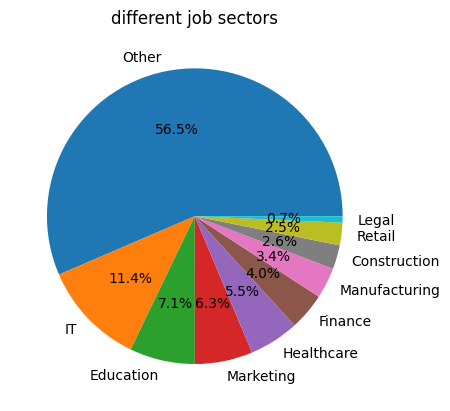

In [44]:
new_df["job_sector"] = new_df["job"].apply(assign_sector)
job = new_df["job_sector"].value_counts().reset_index()
plt.pie(x = job.get("count"), labels = job.get("job_sector"),autopct='%1.1f%%')
plt.title("different job sectors")

In [45]:
job_freq = new_df['job'].value_counts(normalize=True)
new_df['job_encoded'] = new_df['job'].map(job_freq)

In [46]:
new_df.sample(2)

,trans_date_trans_time,category,amt,gender,city_pop,job,is_fraud,distance,age,fraud_merchant_pct,merchant_ordinal,state_cat,state_encoded,job_sector,job_encoded
717911,2019-11-02 23:56:50,personal_care,18.03,F,2526,Phytotherapist,1,83.152166,53,53.333333,501,TX,0.066677,Healthcare,0.002124
1015215,2020-02-23 04:17:30,gas_transport,60.65,F,1970,Energy engineer,0,69.702828,38,43.181818,419,VA,0.023935,IT,0.003937


In [47]:
new_df["gender"] = new_df["gender"].apply(lambda x: int(x == "M"))

In [48]:
new_df.drop(columns = ["job"], inplace = True)

In [49]:
new_df.sample(2)

,trans_date_trans_time,category,amt,gender,city_pop,is_fraud,distance,age,fraud_merchant_pct,merchant_ordinal,state_cat,state_encoded,job_sector,job_encoded
884593,2019-12-22 23:56:10,personal_care,51.50,0,118,1,26.504220,66,50.000000,477,OH,0.035592,Education,0.003782
1027511,2020-03-01 23:38:38,kids_pets,20.41,0,606,1,59.014602,35,36.842105,351,Other,0.012486,Other,0.005647


***Let's extract some datetime info from trans_date_trans_time column***

In [50]:
new_df["trans_date_trans_time"] = pd.to_datetime(new_df["trans_date_trans_time"])

In [51]:
new_df["is_weekend"] = new_df["trans_date_trans_time"].dt.day_name().apply(lambda x : int((x == "Friday") | (x == "Sunday") | (x == "saturday")))

In [52]:
def day_period(x):
    if x >=0 and x < 6: return "Night"
    elif x>= 6 and x <= 12: return "Morning"
    elif x> 12 and x <= 15: return "Afternoon"
    elif x> 15 and x <= 20: return "Evening"
    elif x> 20 and x <= 24: return "Night"


new_df["day_period"] = new_df["trans_date_trans_time"].dt.hour.apply(day_period)

In [53]:
new_df["trans_month"] = new_df["trans_date_trans_time"].dt.month_name()

In [54]:
new_df.drop(columns = ["trans_date_trans_time"], inplace = True)

In [55]:
new_df.sample(2)

,category,amt,gender,city_pop,is_fraud,distance,age,fraud_merchant_pct,merchant_ordinal,state_cat,state_encoded,job_sector,job_encoded,is_weekend,day_period,trans_month
19701,kids_pets,42.49,0,355,0,55.508387,69,38.888889,373,Other,0.009274,Other,0.004922,0,Night,January
298138,gas_transport,9.46,1,76383,1,96.141210,39,40.625000,402,Other,0.009688,Education,0.004404,1,Night,May


In [56]:
numerical = ["amt", "city_pop", "distance", "age", "fraud_merchant_pct", "merchant_ordinal", "state_encoded","job_encoded"]
categorical = [col for col in new_df.columns if col not in numerical]
categorical, numerical

(['category',
  'gender',
  'is_fraud',
  'state_cat',
  'job_sector',
  'is_weekend',
  'day_period',
  'trans_month'],
 ['amt',
  'city_pop',
  'distance',
  'age',
  'fraud_merchant_pct',
  'merchant_ordinal',
  'state_encoded',
  'job_encoded'])

### Univariate Analysis ###
1) Categorical :
 - Observations
  - Female count is more in data.
  - Weekend days are almost half of no weekend days.
  - Lot of transaction happened at Night
  - In the month of December lot of transaction happened.

2) Numerical
 - Observations
  - No much observations, everything looks good with neglegible outliers


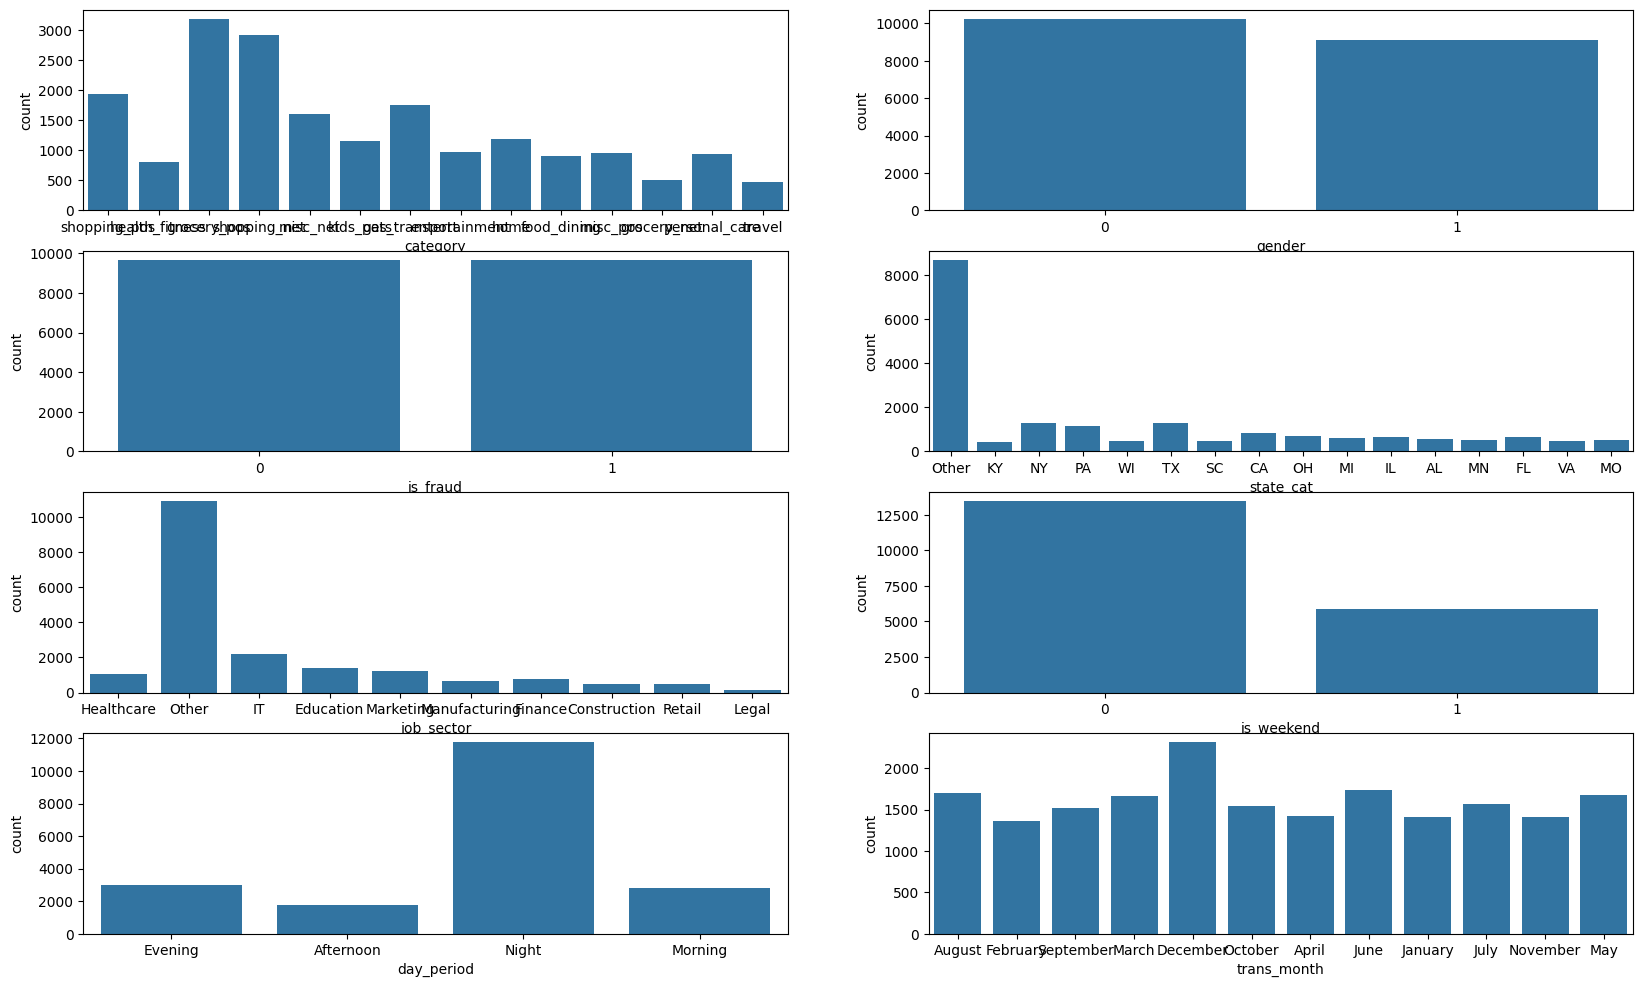

In [57]:
plt.figure(figsize = (20, 12))
cnt = 0
for column in categorical:
    cnt += 1
    plt.subplot(4, 2, cnt)
    sns.countplot(x = new_df[column])

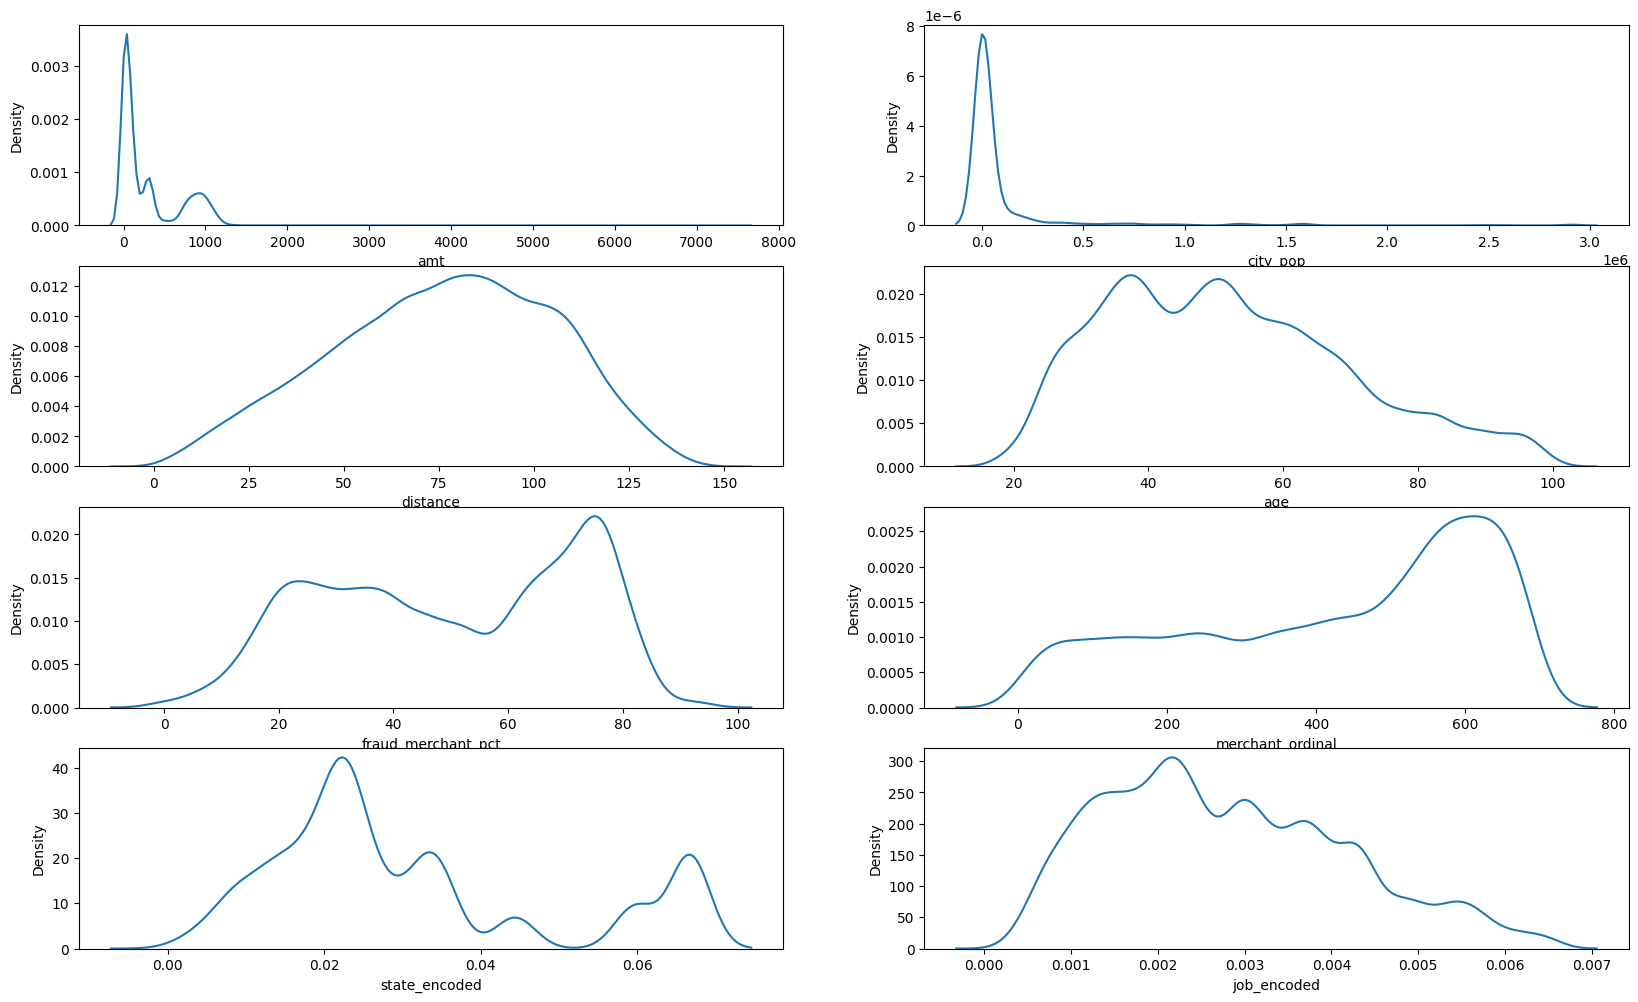

In [58]:
plt.figure(figsize = (20, 12))
cnt = 0
for column in numerical:
    cnt += 1
    plt.subplot(4, 2, cnt)
    sns.kdeplot(x = new_df[column])

In [59]:
for col in numerical:
    print(f"col = {col}\tskewness = {new_df[col].skew()}")

col = amt	skewness = 1.554209483468879
col = city_pop	skewness = 5.628461696119115
col = distance	skewness = -0.21901062311800198
col = age	skewness = 0.5029639209222267
col = fraud_merchant_pct	skewness = -0.14798502512234427
col = merchant_ordinal	skewness = -0.5319638334159288
col = state_encoded	skewness = 0.8575072428764584
col = job_encoded	skewness = 0.47826166724802566


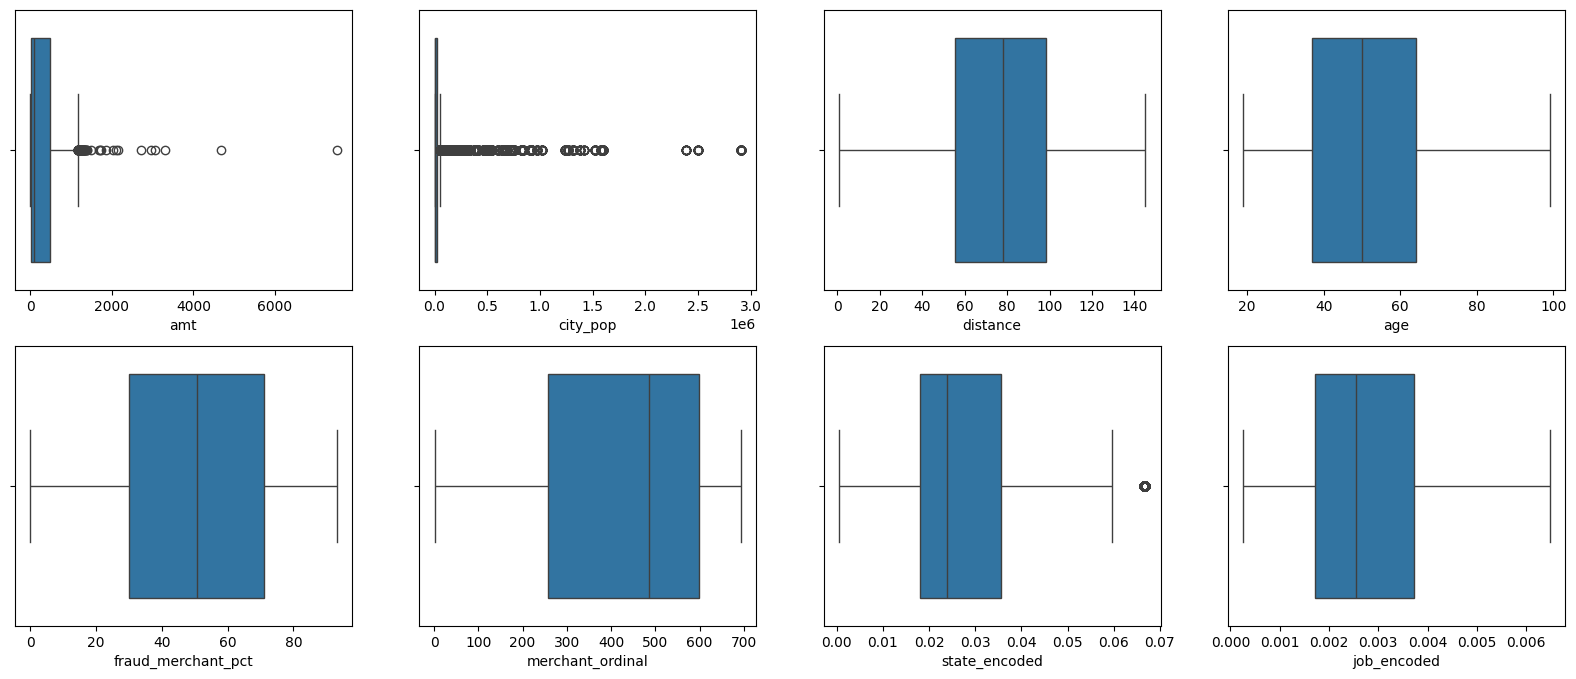

In [60]:
plt.figure(figsize = (20, 8))
cnt = 0
for column in numerical:
    cnt += 1
    plt.subplot(2, 4, cnt)
    sns.boxplot(x = new_df[column])

### Bivariate Analysis ###

1) Numerical Vs Numerical
   ***Observations***

    - merchant ordinal and fraud merchant pct are +vely colinear and variance of fraud merchant pct > mercgant ordinal.
2) Categorical Vs Numerical
   ***Observations***
    - Chance of fraud increses if your transcation amount is high
    - fraud_merchant_pct directly prapotional to is_fraud.
    - Strangely more fraud happened with males compared to females.
    - Weekend has slightly higher amount of transactions.
    - Eventhough highest transaction occured in December the highest amount taken is in February so this is bit risky month.
    - Manufacturing sector has highest users of creditcard according to data
    - Lot of transactions happened in the night.
3) Categorical Vs Categorical
   ***Observations***
    - Shopping net and Misc net has highest fraud rate this might be due to their highest occurance in data
    - Since there is a highest amount transacted in febraury the fraud chances are higher in feb.
    - Although Manufacturer are more using credit card but construction sector facing more fraud, legal dep has less fraud bcz of less usage.
    - Although Femal count is high mens are facing fraud highly
    - Due to high transaction rate at Night the fraud chance also high at night


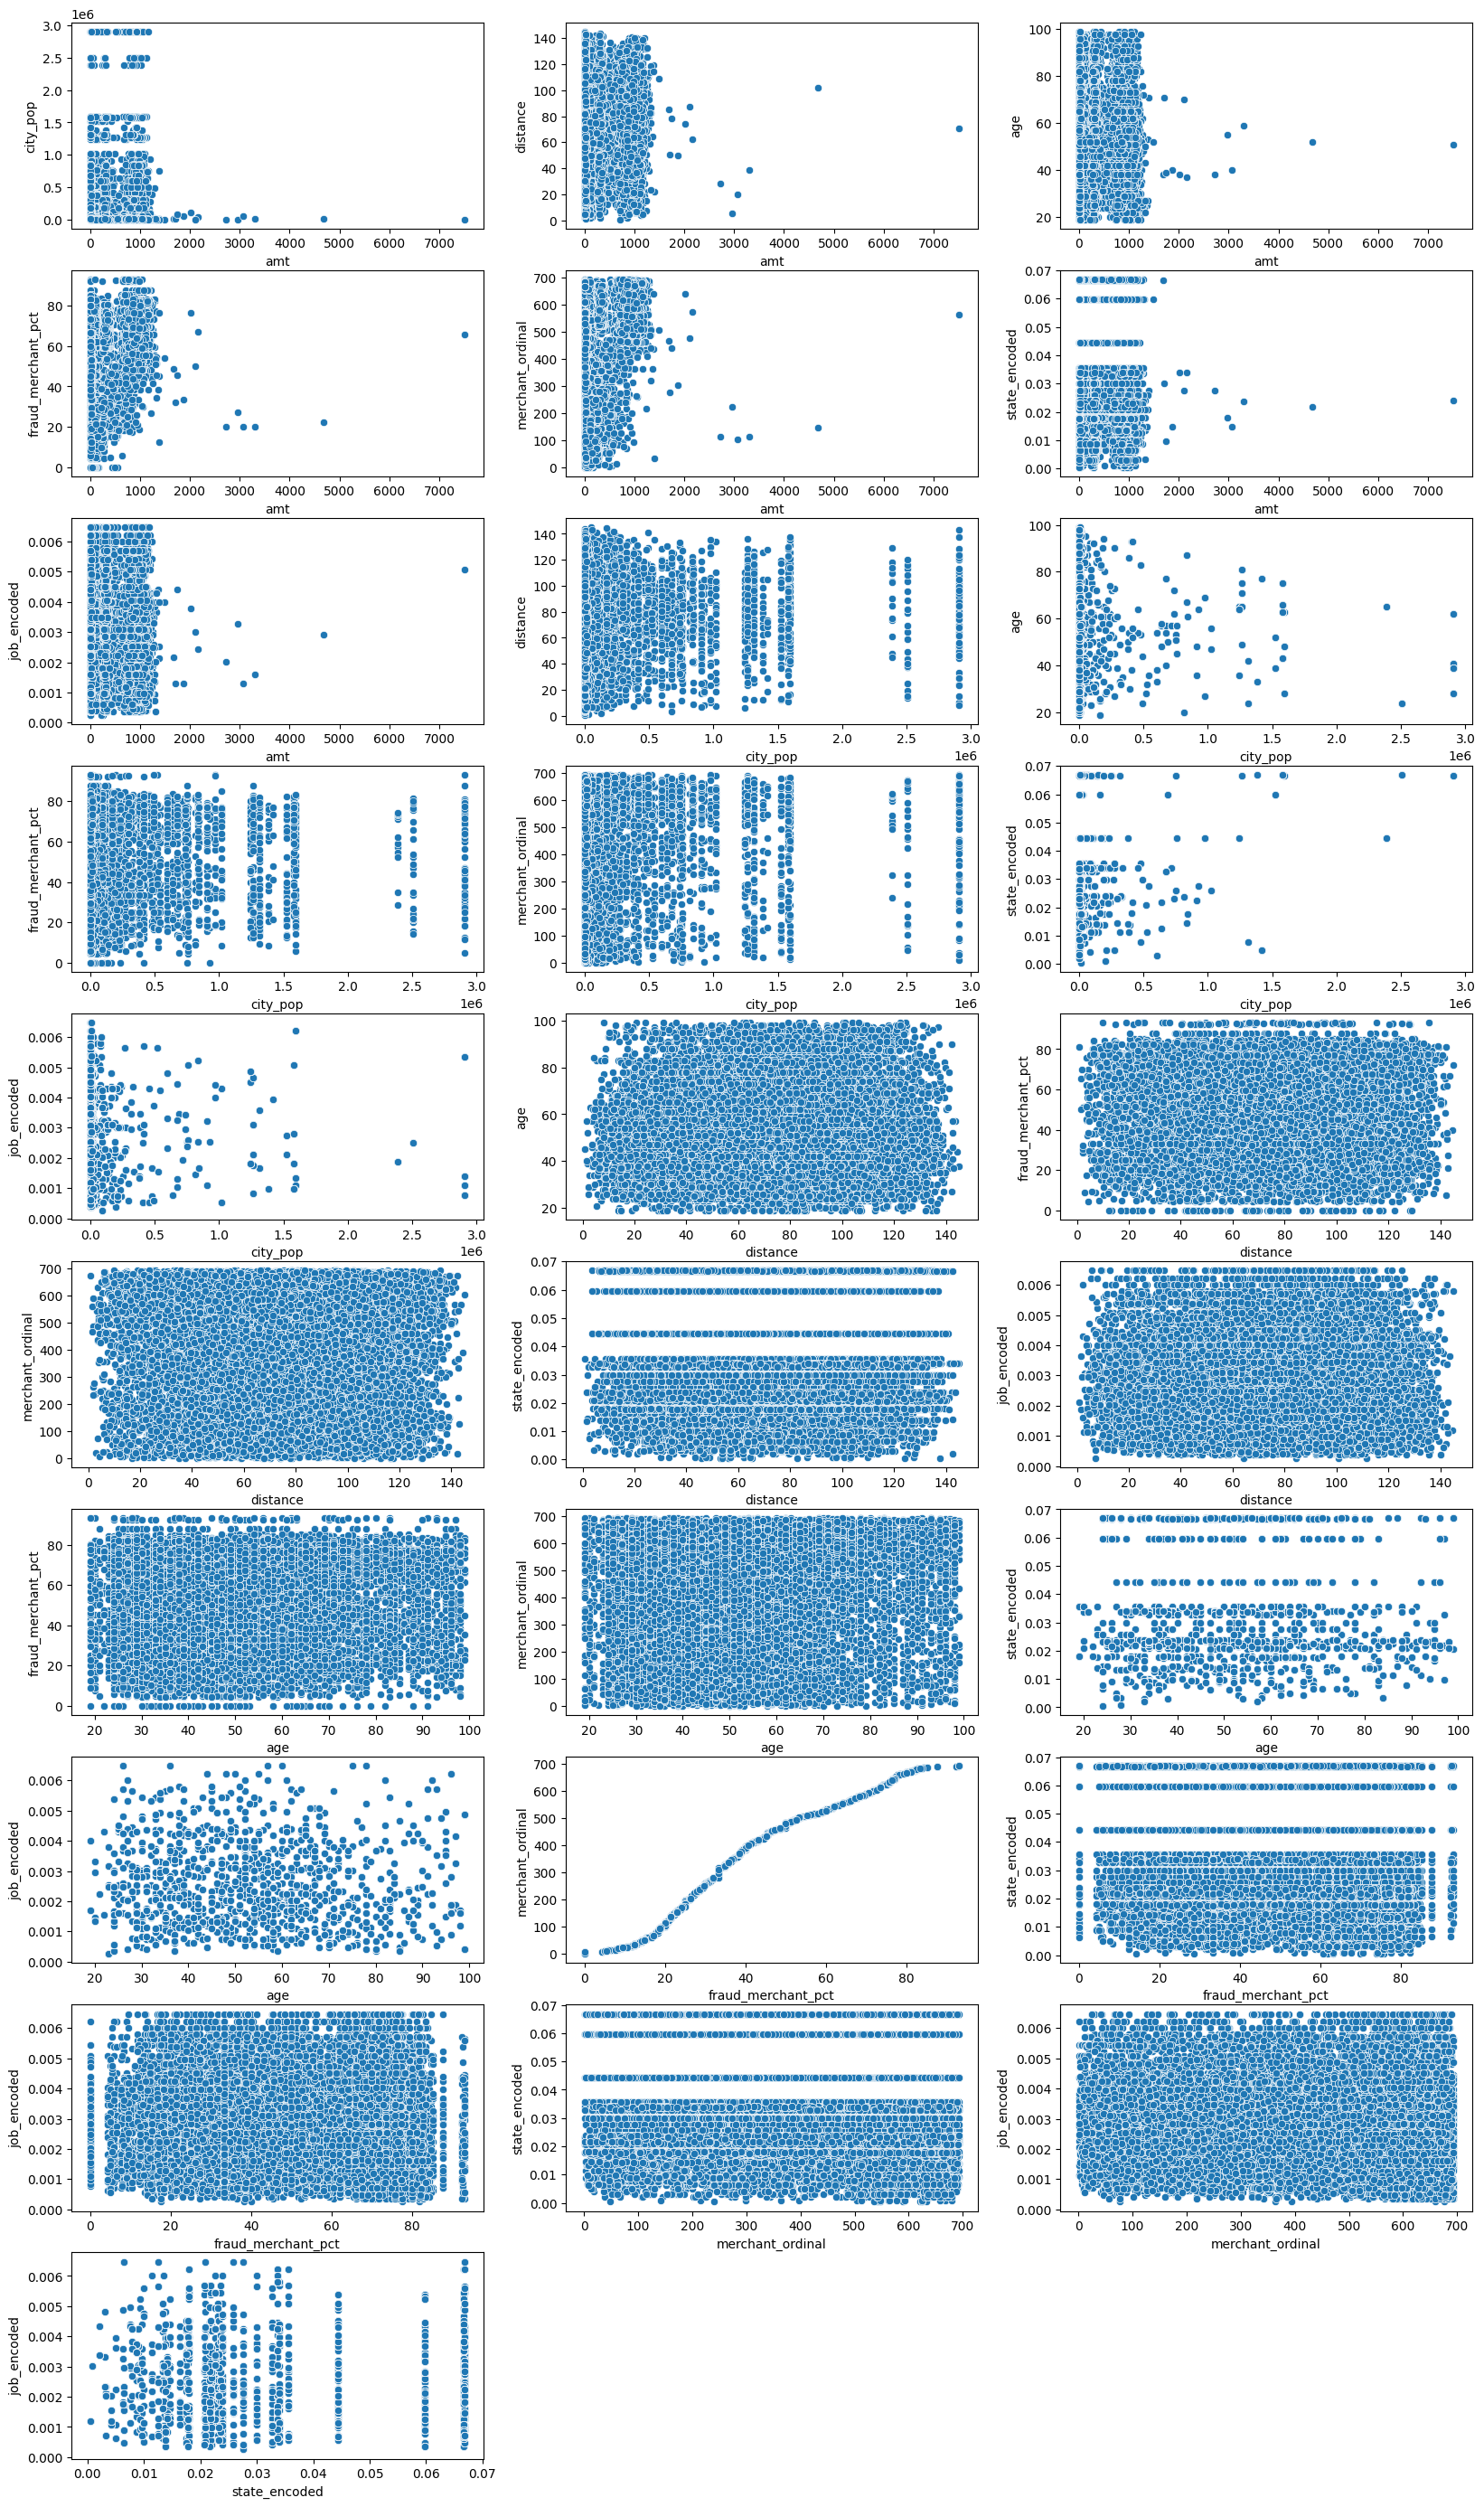

In [61]:
plt.figure(figsize = (20, 35))
cnt = 0
for i in range(len(numerical)):
    for j in range(i + 1, len(numerical)):
        cnt += 1
        plt.subplot(10, 3, cnt)
        sns.scatterplot(x = new_df[numerical[i]], y = new_df[numerical[j]])

<Axes: >

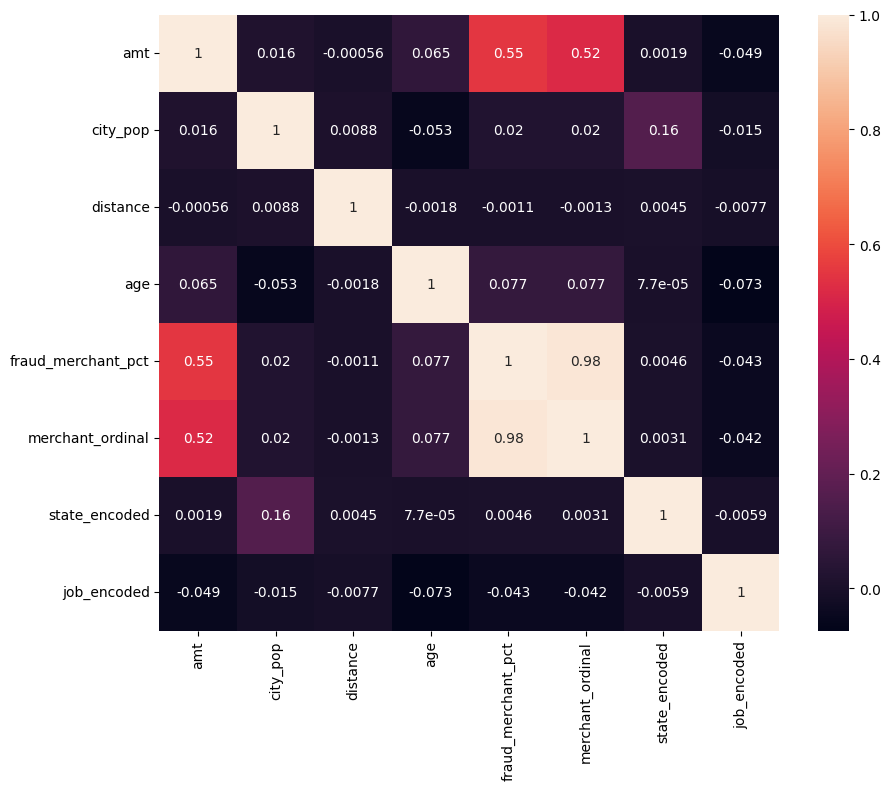

In [62]:
plt.figure(figsize = (10,8))
sns.heatmap(data = new_df[numerical].corr(), annot = True)

In [63]:
new_df.drop(columns = ["merchant_ordinal"], inplace = True)
numerical.remove("merchant_ordinal")

In [64]:
numerical

['amt',
 'city_pop',
 'distance',
 'age',
 'fraud_merchant_pct',
 'state_encoded',
 'job_encoded']

amt VS is fraud


<Axes: xlabel='is_fraud', ylabel='amt'>

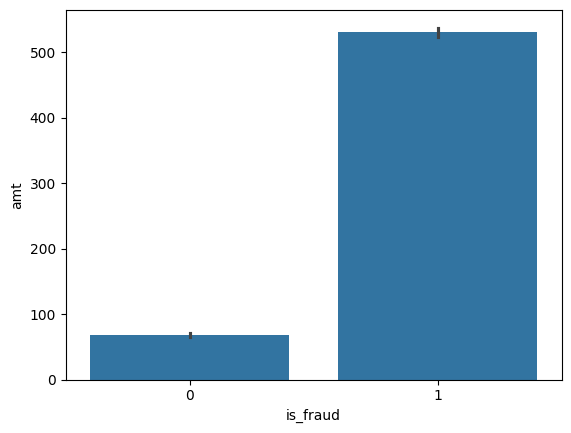

In [65]:
sns.barplot(y = new_df["amt"], x=new_df["is_fraud"])

age VS is_fraud

<Axes: xlabel='is_fraud', ylabel='age'>

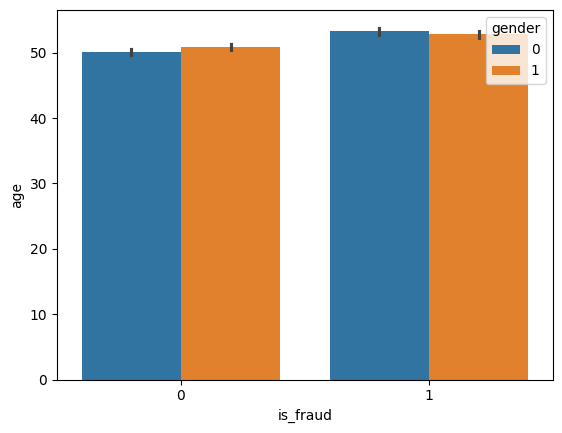

In [66]:
sns.barplot(y = new_df["age"], x=new_df["is_fraud"], hue=new_df["gender"])

<Axes: xlabel='is_fraud', ylabel='fraud_merchant_pct'>

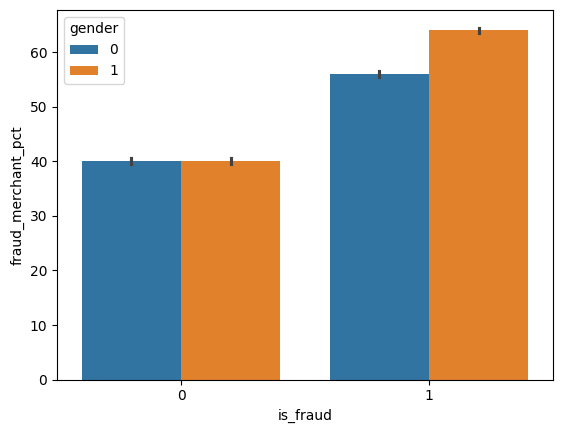

In [67]:
sns.barplot(y = new_df["fraud_merchant_pct"], x=new_df["is_fraud"], hue = new_df["gender"])

In [68]:
# sns.barplot(y = new_df["city_pop"], x=new_df["is_fraud"])
# sns.barplot(y = new_df["distance"], x=new_df["is_fraud"])

<Axes: xlabel='is_weekend', ylabel='amt'>

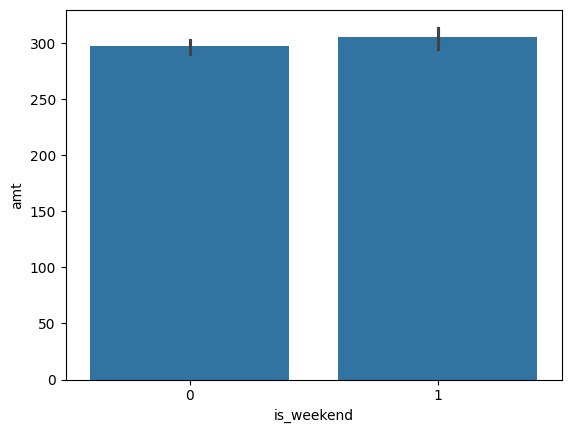

In [69]:
sns.barplot(y = new_df["amt"], x=new_df["is_weekend"])

<Axes: xlabel='trans_month', ylabel='amt'>

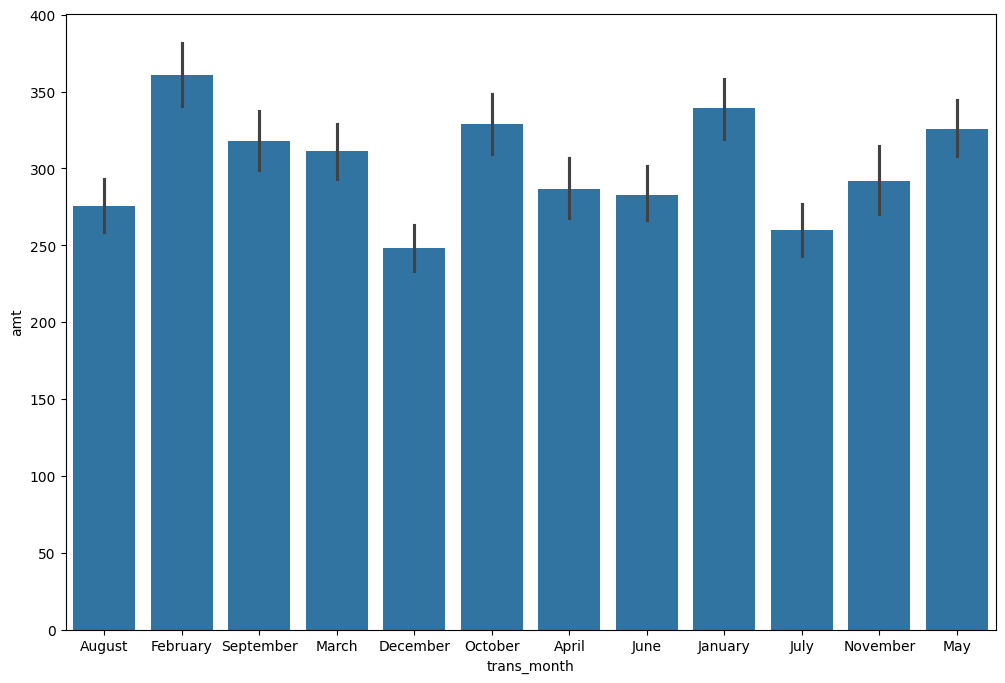

In [70]:
plt.figure(figsize = (12, 8))
sns.barplot(y = new_df["amt"], x=new_df["trans_month"])

<Axes: xlabel='category', ylabel='fraud_merchant_pct'>

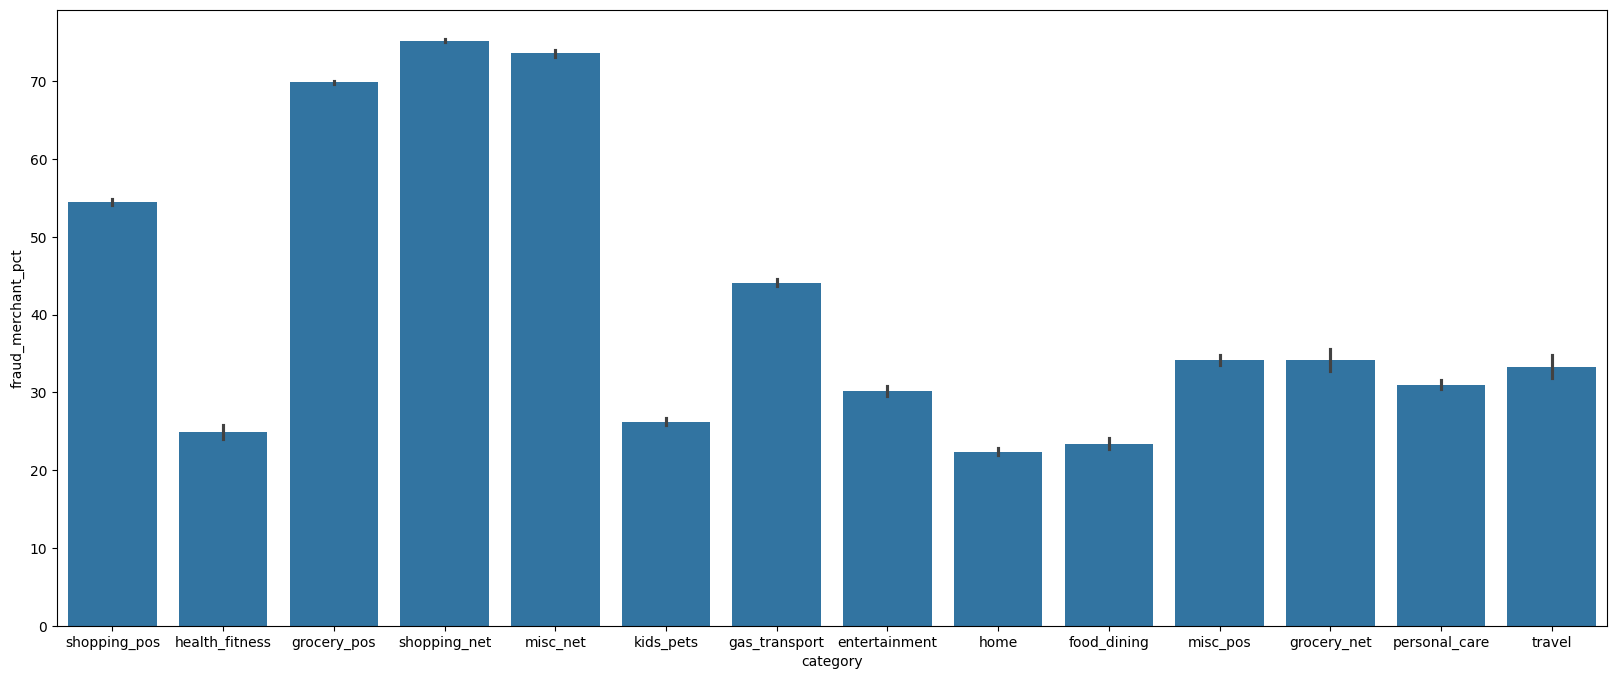

In [71]:
plt.figure(figsize = (20, 8))
sns.barplot(y = new_df["fraud_merchant_pct"], x=new_df["category"])

In [72]:
numerical, categorical

(['amt',
  'city_pop',
  'distance',
  'age',
  'fraud_merchant_pct',
  'state_encoded',
  'job_encoded'],
 ['category',
  'gender',
  'is_fraud',
  'state_cat',
  'job_sector',
  'is_weekend',
  'day_period',
  'trans_month'])

<Axes: xlabel='day_period', ylabel='amt'>

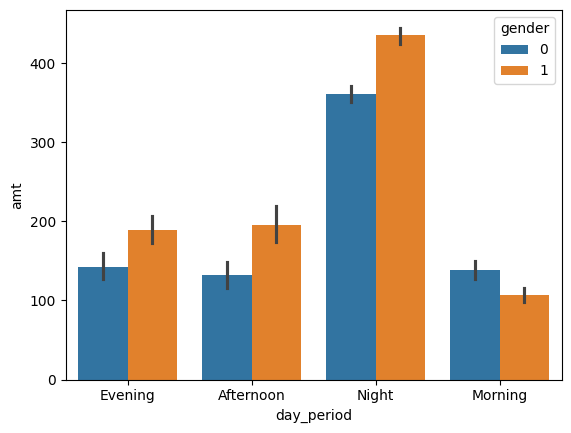

In [73]:
# plt.figure(figsize = (12, 8))
sns.barplot(y = new_df["amt"], x=new_df["day_period"], hue = new_df["gender"])

<Axes: xlabel='is_fraud', ylabel='category'>

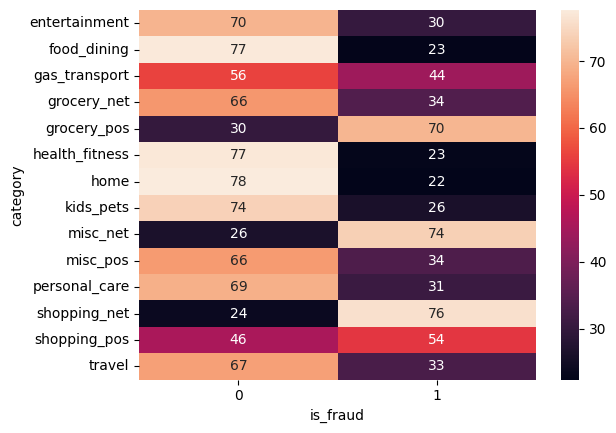

In [74]:
sns.heatmap(data=pd.crosstab(new_df["category"],new_df["is_fraud"], normalize = "index") * 100, annot = True)

<Axes: xlabel='is_fraud', ylabel='is_weekend'>

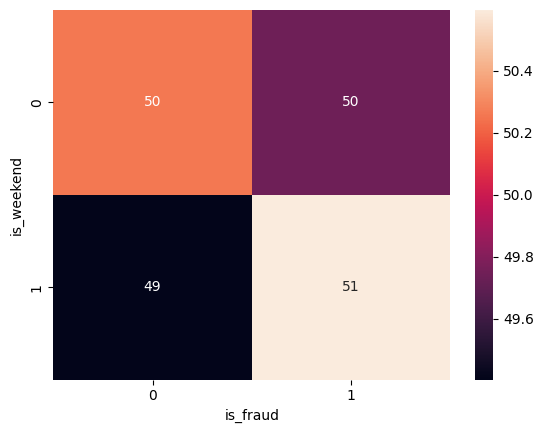

In [75]:
sns.heatmap(data=pd.crosstab(new_df["is_weekend"],new_df["is_fraud"], normalize = "index") * 100, annot = True)

<Axes: xlabel='is_fraud', ylabel='trans_month'>

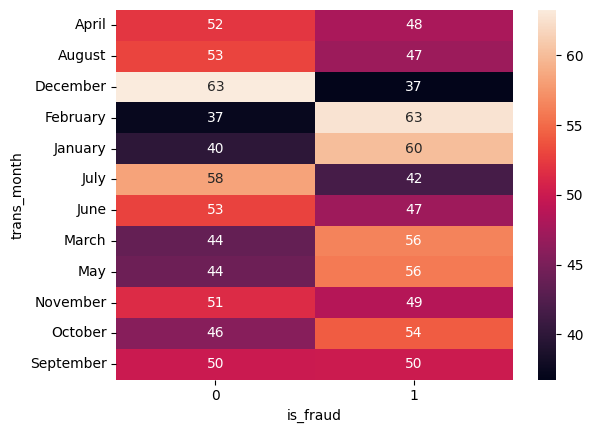

In [76]:
sns.heatmap(data=pd.crosstab(new_df["trans_month"],new_df["is_fraud"], normalize = "index") * 100, annot = True)

<Axes: xlabel='is_fraud', ylabel='job_sector'>

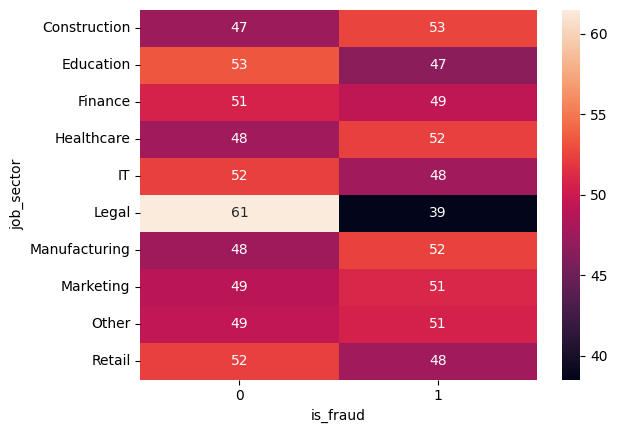

In [77]:
sns.heatmap(data=pd.crosstab(new_df["job_sector"],new_df["is_fraud"], normalize = "index") * 100, annot = True)

<Axes: xlabel='is_fraud', ylabel='gender'>

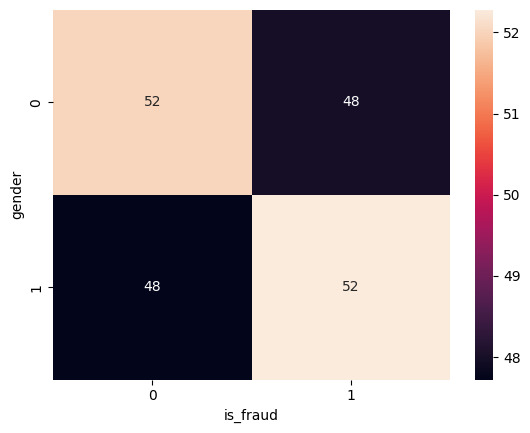

In [78]:
sns.heatmap(data=pd.crosstab(new_df["gender"],new_df["is_fraud"], normalize = "index") * 100, annot = True)

<Axes: xlabel='is_fraud', ylabel='is_weekend'>

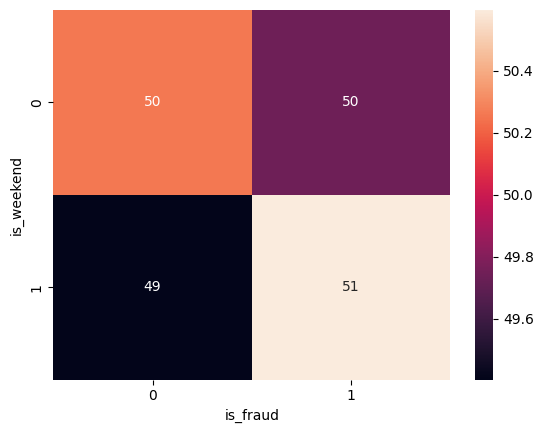

In [79]:
sns.heatmap(data=pd.crosstab(new_df["is_weekend"],new_df["is_fraud"], normalize = "index") * 100, annot = True)

<Axes: xlabel='is_fraud', ylabel='day_period'>

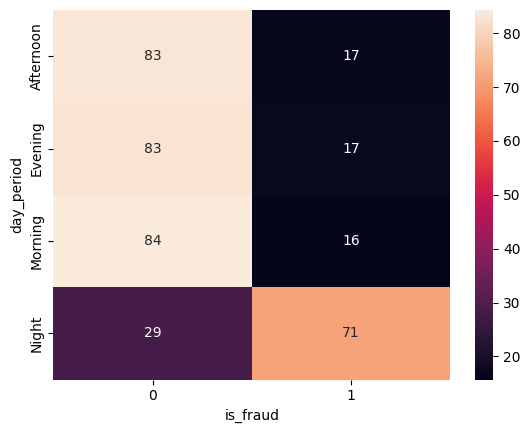

In [80]:
sns.heatmap(data=pd.crosstab(new_df["day_period"],new_df["is_fraud"], normalize = "index") * 100, annot = True)

<Axes: xlabel='is_fraud', ylabel='state_cat'>

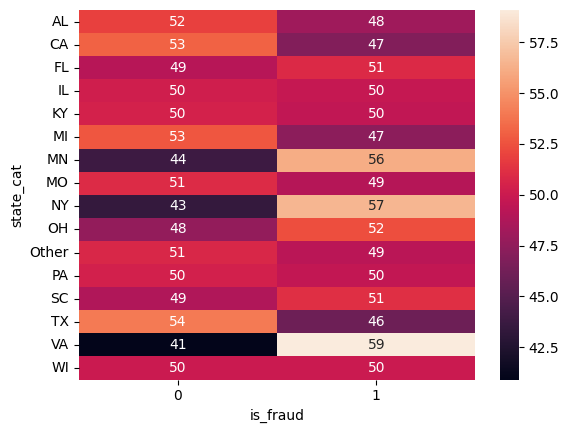

In [81]:
sns.heatmap(data=pd.crosstab(new_df["state_cat"],new_df["is_fraud"], normalize = "index") * 100, annot = True)

In [82]:
new_df.drop(columns = ["state_cat", "is_weekend"], inplace = True)

In [83]:
new_df.sample(2)

,category,amt,gender,city_pop,is_fraud,distance,age,fraud_merchant_pct,state_encoded,job_sector,job_encoded,day_period,trans_month
259776,travel,3.39,1,1595797,0,132.566816,28,36.363636,0.066677,Other,0.001347,Afternoon,May
183597,gas_transport,9.36,1,158701,1,42.018162,46,66.666667,0.013833,Other,0.001865,Night,April


In [84]:
final_df1 = new_df.drop(columns = ["job_sector"])
final_df2 = new_df.drop(columns = ["job_encoded"])

In [85]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
oe = OrdinalEncoder(categories = [["February", "January", "March", "May", "October", "September","November", "April", "August", "June", "July", "December"]])

In [86]:
final_df1["trans_month"] = oe.fit_transform(final_df1[["trans_month"]])
final_df2["trans_month"] = oe.fit_transform(final_df2[["trans_month"]])

In [87]:
oe_period = OrdinalEncoder(categories = [["Night", "Evening", "Afternoon", "Morning"]])
final_df1["day_period"] = oe_period.fit_transform(final_df1[["day_period"]])
final_df2["day_period"] = oe_period.fit_transform(final_df2[["day_period"]])

In [88]:
ohe = OneHotEncoder(sparse_output = False, drop = 'first')

In [89]:
ohe_array = ohe.fit_transform(final_df1[["category"]])

In [90]:
ohe_column = ohe.get_feature_names_out()
ohe_column

array(['category_food_dining', 'category_gas_transport',
       'category_grocery_net', 'category_grocery_pos',
       'category_health_fitness', 'category_home', 'category_kids_pets',
       'category_misc_net', 'category_misc_pos', 'category_personal_care',
       'category_shopping_net', 'category_shopping_pos',
       'category_travel'], dtype=object)

In [91]:
ohe_df = pd.DataFrame(ohe_array, columns = ohe_column, index=final_df1.index)

In [92]:
ohe_df.head()

,category_food_dining,category_gas_transport,category_grocery_net,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel
517683,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1012042,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
581404,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1094893,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
433289,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [93]:
model_df = pd.concat([final_df1, ohe_df], axis = 1)

In [94]:
model_df.sample(2)

,category,amt,gender,city_pop,is_fraud,distance,age,fraud_merchant_pct,state_encoded,job_encoded,...,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel
29765,kids_pets,18.85,0,1679,1,76.251029,38,37.931034,0.023158,0.001451,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
512412,gas_transport,60.68,0,247,0,101.196992,62,40.540541,0.012486,0.000725,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [95]:
model_df.drop(columns = ["category"], inplace = True)

In [96]:
model_df.columns

Index(['amt', 'gender', 'city_pop', 'is_fraud', 'distance', 'age',
       'fraud_merchant_pct', 'state_encoded', 'job_encoded', 'day_period',
       'trans_month', 'category_food_dining', 'category_gas_transport',
       'category_grocery_net', 'category_grocery_pos',
       'category_health_fitness', 'category_home', 'category_kids_pets',
       'category_misc_net', 'category_misc_pos', 'category_personal_care',
       'category_shopping_net', 'category_shopping_pos', 'category_travel'],
      dtype='object')

In [97]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(model_df.drop(columns = ["is_fraud"]), model_df["is_fraud"], test_size = 0.2, random_state = 42)

In [98]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state = 42)

In [99]:
rf.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [100]:
y_pred = rf.predict(x_test)

<ipython-input-101-6dbd774e0c06>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = rf.feature_importances_, y = model_df.drop(columns = ["is_fraud"]).columns, palette=colors)


Text(0.5, 0, 'Feature Importance')

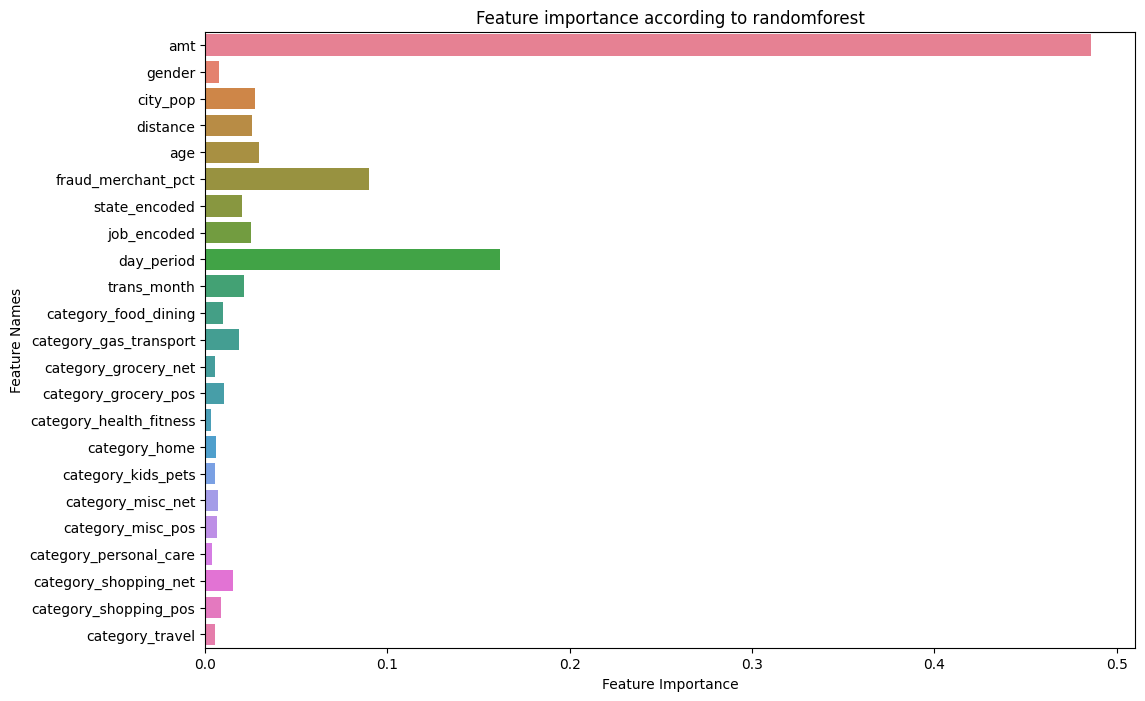

In [101]:
plt.figure(figsize=(12, 8))
colors = sns.color_palette("husl", len(rf.feature_importances_))  # "husl" is just one example palette
sns.barplot(x = rf.feature_importances_, y = model_df.drop(columns = ["is_fraud"]).columns, palette=colors)
plt.title("Feature importance according to randomforest")
plt.ylabel("Feature Names")
plt.xlabel("Feature Importance")

In [102]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier

skf = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)

rf = RandomForestClassifier(random_state=42)
params = {
    'n_estimators' : [100, 150, 200],
    "max_depth" : [i for i in range(8)],
    "max_leaf_nodes" : [3,4,5,6,7,8,9,10]
}

hpt_rf = GridSearchCV(estimator=rf,
                   param_grid=params,
                   cv=skf,
                   verbose=1,
                   n_jobs=-1)

hpt_rf.fit(x_train, y_train)

Fitting 5 folds for each of 192 candidates, totalling 960 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
120 fits failed out of a total of 960.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
120 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1145, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 638, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/util

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [0, 1, 2, 3, 4, 5, 6, 7],
                         'max_leaf_nodes': [3, 4, 5, 6, 7, 8, 9, 10],
                         'n_estimators': [100, 150, 200]},
             verbose=1)

In [103]:
from sklearn. metrics import classification_report
rf = RandomForestClassifier(**hpt_rf.best_params_)
rf.fit(x_train, y_train)
y_pred_rf = rf.predict(x_test)
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.85      0.97      0.91      1929
           1       0.97      0.83      0.89      1932

    accuracy                           0.90      3861
   macro avg       0.91      0.90      0.90      3861
weighted avg       0.91      0.90      0.90      3861



In [104]:
skf = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)

adb = AdaBoostClassifier(random_state=42,)
params = {
    'n_estimators' : [100, 150, 200],
    "learning_rate" : [0.1, 0.01, 0.2, 0.3, 0.5, 1]
}

hpt = GridSearchCV(estimator=adb,
                   param_grid=params,
                   cv=skf,
                   verbose=1,
                   n_jobs=-1)

hpt.fit(x_train, y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=AdaBoostClassifier(random_state=42), n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.01, 0.2, 0.3, 0.5, 1],
                         'n_estimators': [100, 150, 200]},
             verbose=1)

In [105]:
from sklearn. metrics import classification_report
adb = AdaBoostClassifier(**hpt.best_params_)
adb.fit(x_train, y_train)
y_pred_adb = adb.predict(x_test)
print(classification_report(y_test, y_pred_adb))

              precision    recall  f1-score   support

           0       0.94      0.95      0.94      1929
           1       0.95      0.93      0.94      1932

    accuracy                           0.94      3861
   macro avg       0.94      0.94      0.94      3861
weighted avg       0.94      0.94      0.94      3861



In [106]:
skf = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)

xgb = XGBClassifier(random_state=42)
params = {
    'n_estimators': [100, 150, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
    'gamma': [0, 0.1, 0.2]
}

hpt_xgb = GridSearchCV(estimator= xgb,
                   param_grid=params,
                   cv=skf,
                   verbose=1,
                   n_jobs=-1)

hpt_xgb.fit(x_train, y_train)

Fitting 5 folds for each of 729 candidates, totalling 3645 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_typ...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=42, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.8, 0.9, 1.0],
                         'gamma': [0, 0.1, 0.2],
                         'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [100, 150, 200],
                         'subsample': [0.8, 0.9, 1.0]},
             verbose=1)

In [107]:
from sklearn. metrics import classification_report
xgb = XGBClassifier(**hpt_xgb.best_params_)
xgb.fit(x_train, y_train)
y_pred_xgb = xgb.predict(x_test)
print(classification_report(y_test, y_pred_xgb))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1929
           1       0.98      0.98      0.98      1932

    accuracy                           0.98      3861
   macro avg       0.98      0.98      0.98      3861
weighted avg       0.98      0.98      0.98      3861



In [108]:
from sklearn.ensemble import VotingClassifier
estimators = [
    ('xgb', xgb),  # Name and model instance
    ('adb', adb),  # Name and model instance
    # ('rf', rf)     # Name and model instance
]

vcls = VotingClassifier(estimators=estimators,voting="soft")

In [109]:

vcls.fit(x_train, y_train)
y_pred_vcls = vcls.predict(x_test)
print(classification_report(y_test, y_pred_vcls))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1929
           1       0.98      0.98      0.98      1932

    accuracy                           0.98      3861
   macro avg       0.98      0.98      0.98      3861
weighted avg       0.98      0.98      0.98      3861



In [110]:
from sklearn.metrics import roc_auc_score
print(roc_auc_score(y_test, y_pred_vcls))

0.9769475543277016


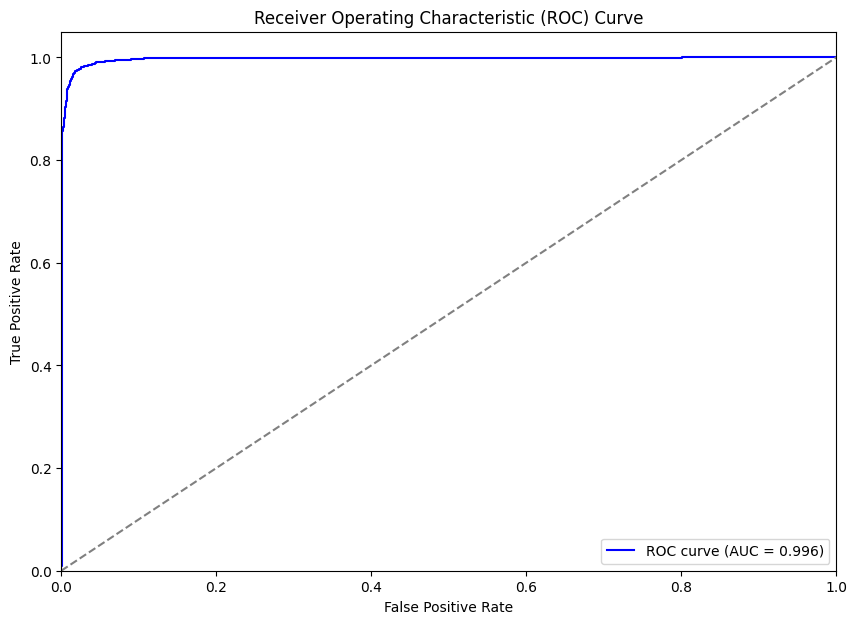

In [111]:
from sklearn.metrics import roc_curve
y_pred_proba = vcls.predict_proba(x_test)[:, 1]  # Get probabilities for the positive class

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Calculate AUC-ROC
auc_roc = roc_auc_score(y_test, y_pred_proba)

# Plot ROC curve
plt.figure(figsize=(10, 7))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {auc_roc:.3f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [344]:
# import joblib

# # Save the model
# joblib.dump(vcls, './models/voting_classifier_model.pkl')
# joblib.dump(xgb, './models/xgb_classifier_model.pkl')
# joblib.dump(adb, './models/adb_classifier_model.pkl')
# joblib.dump(rf, './models/random-forest_classifier_model.pkl')